# The Zen of Python

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Setting up Quandl for your environment

In [3]:
import pandas
pandas.__version__

'1.1.5'

# Plotting your first chart

## Retrieving dataset from Quandl

In [4]:
import quandl

# Replace with your own Quandl API key
QUANDL_API_KEY = 'LBAs323xHGD3nWETZhow'  
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN')

In [5]:
df.head()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.18,18.43,18.000,18.35,38392898.0,7.003281e+08
2015-11-23,18.45,18.70,18.215,18.61,3352514.0,6.186446e+07
2015-11-24,18.70,18.80,18.370,18.80,4871901.0,8.994087e+07
2015-11-25,18.85,19.50,18.770,19.45,4802607.0,9.153862e+07
2015-11-26,19.48,19.67,19.410,19.43,1648481.0,3.220713e+07


In [6]:
df.tail()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2021-05-26,10.89,10.890,10.496,10.644,3447200.0,36676187.0
2021-05-27,10.60,10.980,10.584,10.902,3498258.0,38042273.0
2021-05-28,10.90,10.998,10.856,10.964,3001692.0,32847836.0
2021-05-31,11.00,11.030,10.920,10.920,1426676.0,15650390.0
2021-06-01,10.98,11.220,10.980,11.142,2689318.0,29976401.0


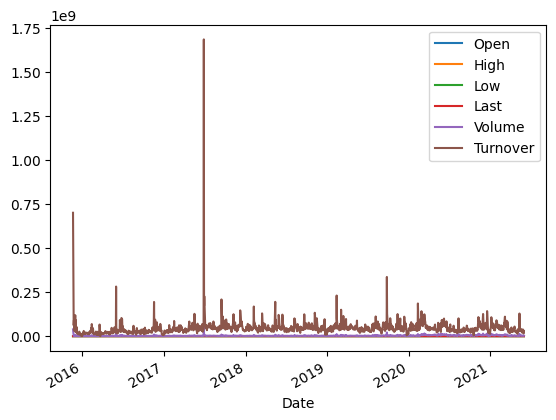

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot();

## Plotting a price and volume chart

In [8]:
prices = df['Last']
volumes = df['Volume']

In [9]:
prices.head()

Date
2015-11-20    18.35
2015-11-23    18.61
2015-11-24    18.80
2015-11-25    19.45
2015-11-26    19.43
Name: Last, dtype: float64

In [10]:
volumes.tail()

Date
2021-05-26    3447200.0
2021-05-27    3498258.0
2021-05-28    3001692.0
2021-05-31    1426676.0
2021-06-01    2689318.0
Name: Volume, dtype: float64

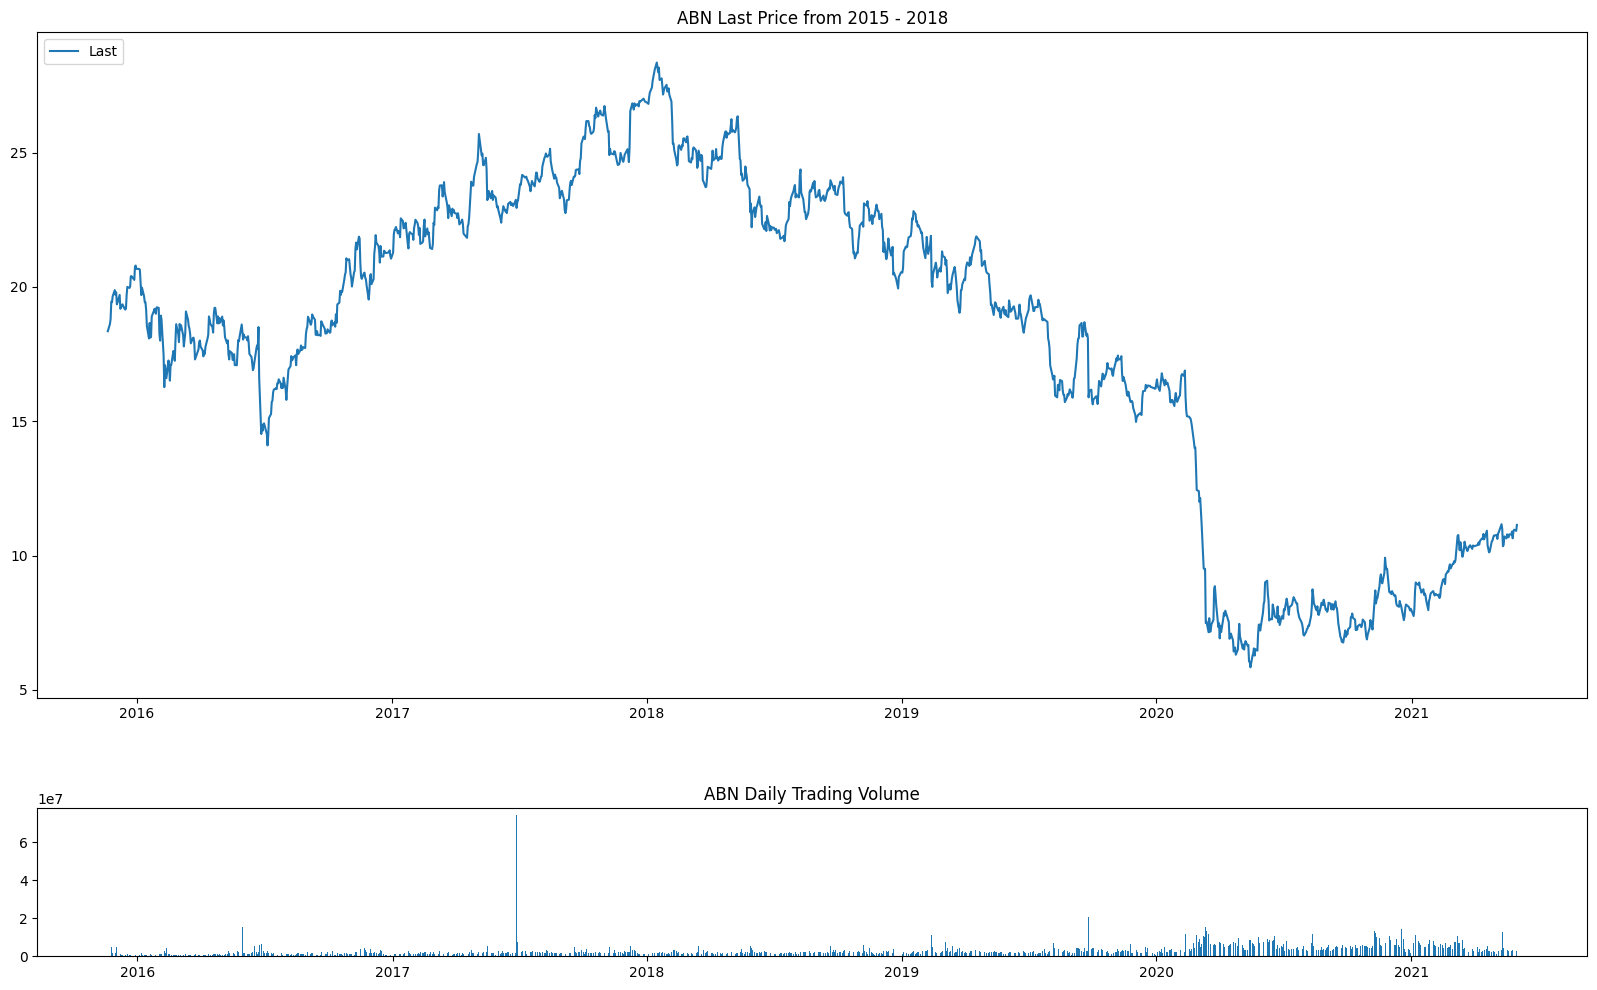

In [11]:
# The top plot consisting of dailing closing prices
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4) #(4,4) = 전체 그래프를 4X4 그리드로 나눔, (0,0) = 왼쪽 상단 모서리에 고정
top.plot(prices.index, prices, label='Last')
plt.title('ABN Last Price from 2015 - 2018')
plt.legend(loc=2)

# The bottom plot consisting of daily trading volume
bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title('ABN Daily Trading Volume')

plt.gcf().set_size_inches(20, 12)
plt.subplots_adjust(hspace=0.75)

## Plotting a candlestick chart

In [ ]:
# pip install mplfinance

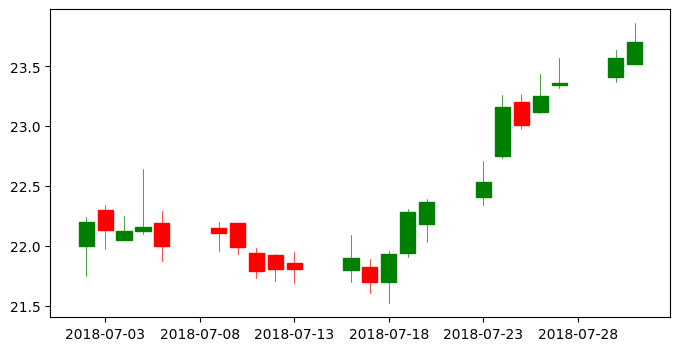

In [18]:
%matplotlib inline
import quandl
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = QUANDL_API_KEY
df_subset = quandl.get('EURONEXT/ABN',  # data set 준비
                       start_date='2018-07-01', 
                       end_date='2018-07-31')

df_subset['Date'] = df_subset.index.map(mdates.date2num)


df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Last']]

figure, ax = plt.subplots(figsize = (8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax,  #
                 df_ohlc.values, 
                 width=0.8, 
                 colorup='green', 
                 colordown='red')
plt.show()

# Performing Financial Analytics

## Plotting returns

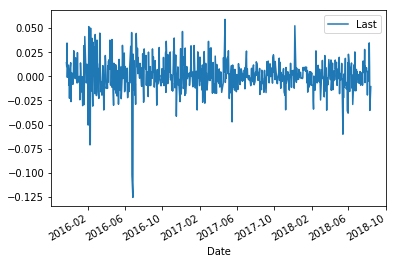

In [17]:
%matplotlib inline
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods=1) # 이전 행의 백분율 변화가 DataFrame의 모든 행에 대해 계산, 이동할 기간 수(기본값 1)
daily_changes.plot();

## Plotting cummulative returns

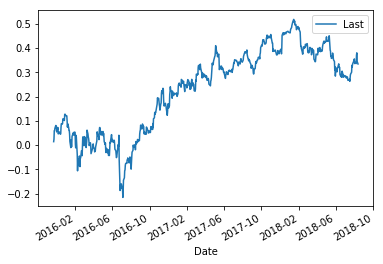

In [19]:
df_cumsum = daily_changes.cumsum() #누적 합계
df_cumsum.plot();

## Plotting Histograms

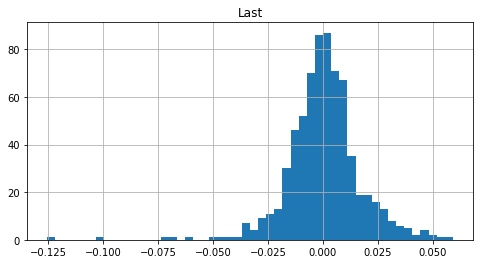

In [20]:
daily_changes.hist(bins=50, figsize=(8, 4));

In [21]:
daily_changes.describe()

,Last
count,693.000000
mean,0.000483
std,0.016695
min,-0.125527
25%,-0.008100
50%,0.000552
75%,0.008753
max,0.059123


## Plotting volatility

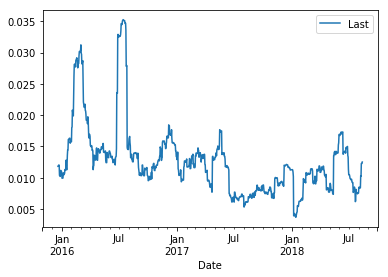

In [22]:
df_filled = df.asfreq('D', method='ffill') # D 일일 빈도, ffill = forward fill, 빈 날짜 채우기
df_returns = df_filled.pct_change() # 각 행에 대해 전날 대비 변화를 백분율로 계산
df_std = df_returns.rolling(window=30, min_periods=30).std() # 30일 기간, 최소 30일 데이터가 있어야 표준편차 계산
df_std.plot();

## Quantile-Quantile Plot

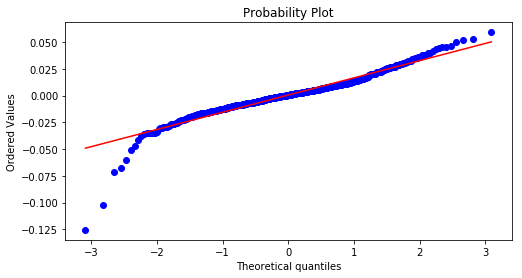

In [23]:
%matplotlib inline
import quandl
from scipy import stats
from scipy.stats import probplot

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods=1).dropna()

figure = plt.figure(figsize=(8,4))
ax = figure.add_subplot(111)
stats.probplot(daily_changes['Last'], dist='norm', plot=ax)
plt.show();

## Downloading multiple time series data

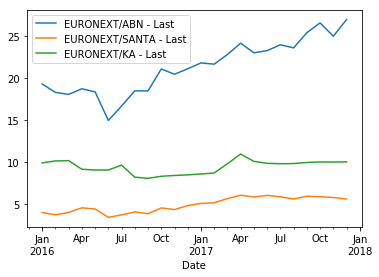

In [24]:
%matplotlib inline
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get(['EURONEXT/ABN.4', # 4는 종가(close price) 의미
                 'EURONEXT/SANTA.4', 
                 'EURONEXT/KA.4'], 
                collapse='monthly',  # 월별 집계
                start_date='2016-01-01', 
                end_date='2017-12-31')
df.plot();

## Displaying the Correlation Matrix


In [25]:
df.pct_change().corr()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
EURONEXT/ABN - Last,1.000000,0.809824,0.096238
EURONEXT/SANTA - Last,0.809824,1.000000,0.058095
EURONEXT/KA - Last,0.096238,0.058095,1.000000


## Plotting Correlations

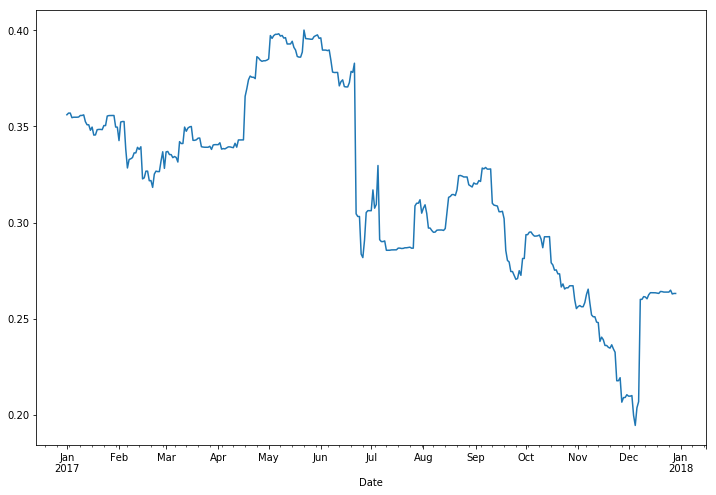

In [5]:
%matplotlib inline
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get(['EURONEXT/ABN.4', 'EURONEXT/SANTA.4'], 
                start_date='2016-01-01', 
                end_date='2017-12-31')

df_filled = df.asfreq('D', method='ffill')
daily_changes= df_filled.pct_change()
abn_returns = daily_changes['EURONEXT/ABN - Last']
santa_returns = daily_changes['EURONEXT/SANTA - Last']
window = int(len(df_filled.index)/2)
df_corrs = abn_returns\
    .rolling(window=window, min_periods=window)\
    .corr(other=santa_returns)
    .dropna()
df_corrs.plot(figsize=(12, 8));

## Simple moving averages


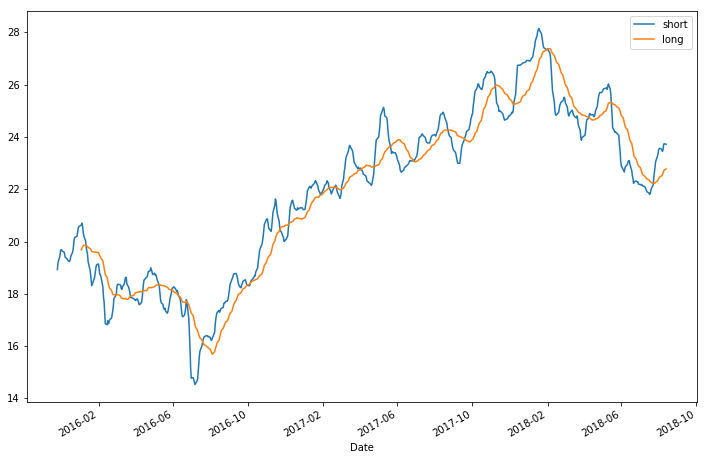

In [27]:
%matplotlib inline
import quandl
import pandas as pd

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));

## Exponential Moving Average


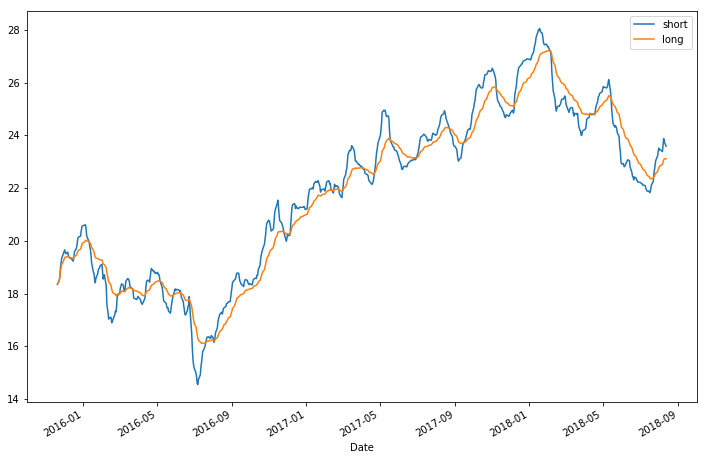

In [28]:
%matplotlib inline
import quandl
import pandas as pd

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']

series_short = df_last.ewm(span=5).mean()
series_long = df_last.ewm(span=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));